# Исследование рынка заведений общественного питания г.Москвы.

Проект - открытие небольшого кафе в Москве, где гостей должны обслуживать роботы. 

Заказчик этого исследования — инвесторы данного проекта.

Необходимо изучить текущее положение дел на рынке заведений общественного питания г.Москвы. 

Работать будем с открытыми данными о заведениях общественного питания в Москве.

## Изучение данных

In [1]:
#импорт библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt

#импорт бибилиотеки pandas
import pandas as pd

import seaborn as sns

import numpy as np

import plotly.express as px



from plotly import graph_objects as go

pd.set_option('display.float_format', '{:,.2f}'.format)

#Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 

#чтение файла с данными и сохранение в переменной data
data = pd.read_csv('/datasets/rest_data.csv')
#чтение файла с данными по районам и сохранение в переменной distr
distr = pd.read_csv('https://my-files.su/Save/w2rqlk/mosgaz-streets.csv')

In [2]:
distr.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [3]:
#вывод на экран первые 20 строк таблицы
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
#получение общей информации о данных в таблице 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
#получение некоторых числовых показателей для столбцов с числовыми значениями
data.describe()

,id,number
count,"15,366.00","15,366.00"
mean,"119,720.07",59.55
std,"73,036.13",74.74
min,838.00,0.00
25%,"28,524.00",12.00
50%,"144,974.50",40.00
75%,"184,262.25",80.00
max,"223,439.00","1,700.00"


***Вывод п.1:
I. Изучив общую информацию, делаем выводы:

1) В таблице 6 столбцов.
Согласно прилагаемой документации:
id — идентификатор объекта;
object_name — название объекта общественного питания;
chain — сетевой ресторан;
object_type — тип объекта общественного питания;
address — адрес;
number — количество посадочных мест.

2) Количество значений во всех столбцах одинаковое - значит в данных пропусков нет.

3) Типы данных соотвествуют данным.

II. Согласно информации некоторых числовых показателей таблицы:

1) вызвали подозрения некоторые параметры по столбцу number — количество посадочных мест, которые требуют проверки:

- минимальное значение равно 0;
- максимальное значение равно 1700.

## Предобработка данных

### Проверка дубликатов

Подсчитаем явные дубликаты.

In [6]:
#подсчет явных дубликатов
data.duplicated().sum()

0

In [7]:
# найдем дубликаты во всех столбцах, кроме столбца id
data.loc[data.duplicated(subset = ['object_name','chain','object_type','address','number'], \
                         keep = False)].head()

,id,object_name,chain,object_type,address,number
2374,28603,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2869,25031,LALTRO BOSCO,нет,ресторан,"город Москва, улица Петровка, дом 10",145
3480,20913,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
3481,20914,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40


In [8]:
#удалим найденные дубликаты
data.drop_duplicates(subset = ['object_name','chain','object_type','address','number'], \
                         keep = False).head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


### Проверка числовых показателей

Проверим некоторые параметры по столбцу number — количество посадочных мест:
- минимальное значение равно 0;
- максимальное значение равно 1700

In [9]:
#найдем строку с максимальным значением столбца 'number'
data[data['number'] == data['number'].max()]['number']

12723    1700
Name: number, dtype: int64

In [10]:
#выведем на экран строку с максимальным значением столбца 'number'
data.loc[12723]

id                                                        199696
object_name                                 Arena by Soho Family
chain                                                        нет
object_type                                                  бар
address        город Москва, Кутузовский проспект, дом 36, ст...
number                                                      1700
Name: 12723, dtype: object

Согласно информации из интернета: Arena by Soho Family рассчитана на прием до 4000 гостей и включает в себя просторный танцпол, гардероб на 6000 мест, балконы с барами, вместительную и комфортную бекстейдж зону, гримерные для артистов, VIP зал, караоке. То есть данные в 1700 посадочных мест правдоподобные.

In [11]:
#выведем на экран столбцы с количеством комнат равных 0
data[data['number'] == data['number'].min()].head()

,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,Суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,126956,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0


Изучив данные по строкам со значением посадочных мест раных 0, видим, что все это - предприятия быстрого обслуживания, которые работают на доставку или "на вынос", в таких заведениях дествитедьно нет посадочных мест. То есть предоставленные данные так же правдоподобные.

***Вывод п.2:

- явных дубликатов не обнаружено, НО в данных есть особенность - их собирали из различных источников и могло так получится, что один и тот же объект попал несколько раз. Поэтому мы  проверили это - выявили дубликаты без столбца id и потом их удалили;
- числовые значение столбца number, которые вызвали подозрения, были проверены и подтверждена их прадоподобность.

## Исследовательский анализ

### Cоотношение видов объектов общественного питания по количеству. 

In [12]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [13]:
#соберем все уникальные совпадения столбца 'object_type'
data['object_type'].value_counts()


кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [14]:
#построим датафрейм и сбросим индексы
uniq_type = pd.DataFrame(data['object_type'].value_counts()).reset_index()    
uniq_type

,index,object_type
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


Text(0, 0.5, 'Тип объекта')

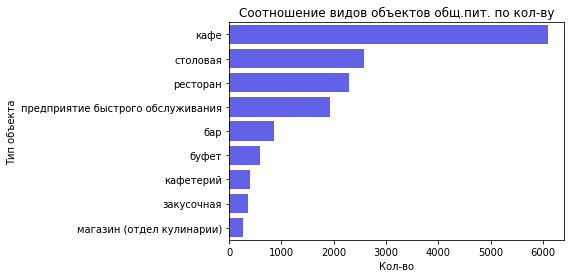

In [15]:
#построим столбчатую диаграмму
ax = sns.barplot(x='object_type', y='index', data=uniq_type, color = 'blue', alpha=0.7) 
ax.set_title('Cоотношение видов объектов общ.пит. по кол-ву')
ax.set_xlabel('Кол-во')
ax.set_ylabel('Тип объекта')
#plt.xticks(rotation=90)
#plt.yticks(rotation=90)

Согласно графика можно сделать вывод, что самый популярный вид объекта общ.пит. - кафе, а самый мало распространенный вид в Москве - магазин(отдел кулинарии)

### Соотношение сетевых и несетевых заведений по количеству. 

In [16]:
#соберем все уникальные совпадения столбца 'chain'
data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [17]:
#посчитаем соотношение сетевых и несетевых заведений по количеству
(data[data['chain'] == 'нет']['chain']).count() / (data[data['chain'] == 'да']['chain']).count()

4.17722371967655

In [18]:
#построим датафрейм и сбросим индексы
uniq_chain = pd.DataFrame(data['chain'].value_counts()).reset_index() 
uniq_chain 

,index,chain
0,нет,12398
1,да,2968


(array([0, 1]), <a list of 2 Text xticklabel objects>)

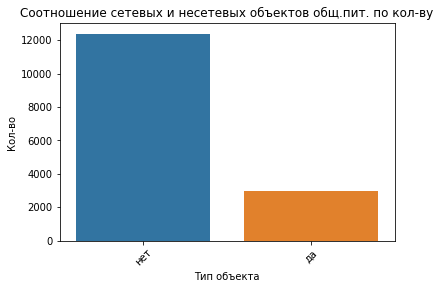

In [19]:
#построим столбчатую диаграмму
ax = sns.barplot(x='index', y='chain', data=uniq_chain) 
ax.set_title('Cоотношение сетевых и несетевых объектов общ.пит. по кол-ву')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Кол-во')
plt.xticks(rotation=45)

Таким образом, количество несетевых объектов общ.пит. в 4 раза больше, чем количество сетевых.

### Сетевые объекты общественного питания

In [20]:
#выведим строки сетевых объектов общ.пит.
type2 = data[data['chain'] == 'да']
type2.head()

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160


- Для какого вида объекта общественного питания характерно сетевое распространение??

In [21]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [22]:
#сгруппируем по виду и типу объекта и посчитаем количество
uniq_type3 = pd.DataFrame(data.groupby(['chain','object_type'])[['number']]\
                          .count()).reset_index() 
uniq_type3

,chain,object_type,number
0,да,бар,37
1,да,буфет,11
2,да,закусочная,56
3,да,кафе,1396
4,да,кафетерий,52
5,да,магазин (отдел кулинарии),78
6,да,предприятие быстрого обслуживания,791
7,да,ресторан,544
8,да,столовая,3
9,нет,бар,819


In [23]:
#сгруппируем только по типу и посчитаем количество
uniq_type4 = pd.DataFrame(data.groupby(['object_type'])[['number']]\
                          .count()).reset_index() 

uniq_type4

,object_type,number
0,бар,856
1,буфет,585
2,закусочная,360
3,кафе,6099
4,кафетерий,398
5,магазин (отдел кулинарии),273
6,предприятие быстрого обслуживания,1923
7,ресторан,2285
8,столовая,2587


In [24]:
#объединим два датасета по столбцу object_type
uniq_type_mer = uniq_type3.merge(uniq_type4, on='object_type', how='left')
uniq_type_mer

,chain,object_type,number_x,number_y
0,да,бар,37,856
1,да,буфет,11,585
2,да,закусочная,56,360
3,да,кафе,1396,6099
4,да,кафетерий,52,398
5,да,магазин (отдел кулинарии),78,273
6,да,предприятие быстрого обслуживания,791,1923
7,да,ресторан,544,2285
8,да,столовая,3,2587
9,нет,бар,819,856


In [25]:
#добавим новый столбец с расчетом доли сетевых/несетевых объектов в общем количестве 
#заведений одного типа

uniq_type_mer['frac'] = (uniq_type_mer['number_x'] / uniq_type_mer['number_y'])*100
uniq_type_mer

,chain,object_type,number_x,number_y,frac
0,да,бар,37,856,4.32
1,да,буфет,11,585,1.88
2,да,закусочная,56,360,15.56
3,да,кафе,1396,6099,22.89
4,да,кафетерий,52,398,13.07
5,да,магазин (отдел кулинарии),78,273,28.57
6,да,предприятие быстрого обслуживания,791,1923,41.13
7,да,ресторан,544,2285,23.81
8,да,столовая,3,2587,0.12
9,нет,бар,819,856,95.68


In [26]:
#выделим из таблицы uniq_type_mer только данные по сетевым заведениям
ch = uniq_type_mer.query("chain=='да'").sort_values(by='frac', ascending=True)
ch

,chain,object_type,number_x,number_y,frac
8,да,столовая,3,2587,0.12
1,да,буфет,11,585,1.88
0,да,бар,37,856,4.32
4,да,кафетерий,52,398,13.07
2,да,закусочная,56,360,15.56
3,да,кафе,1396,6099,22.89
7,да,ресторан,544,2285,23.81
5,да,магазин (отдел кулинарии),78,273,28.57
6,да,предприятие быстрого обслуживания,791,1923,41.13


Text(0, 0.5, 'Тип объекта')

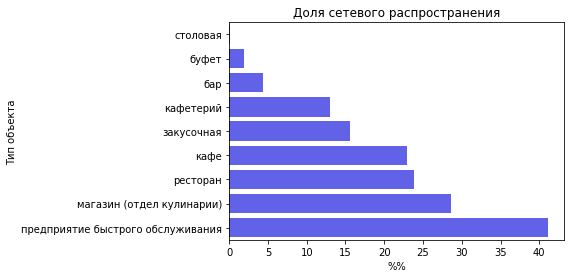

In [27]:
#построим столбчатую диаграмму
ax = sns.barplot(x='frac', y='object_type', data=ch, color = 'blue', alpha=0.7) 
ax.set_title('Доля сетевого распространения')
ax.set_xlabel('%%')
ax.set_ylabel('Тип объекта')
#plt.xticks(rotation=90)
#plt.yticks(rotation=90)

То есть делаем вывод: не смотря на то, что несетевое распространение объектов общ.пит. значительно превышает сетевое, для типа объекта  - предприятие быстрого обслуживания - характерно сетевое распространение.

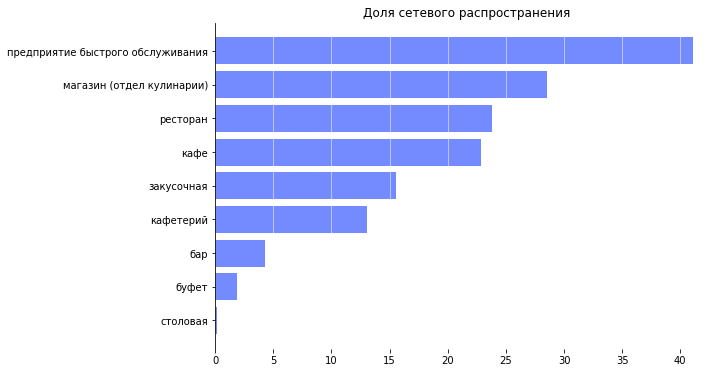

In [28]:
vis_ = uniq_type_mer.query("chain=='да'").sort_values(by='frac', ascending=True)

fig, ax = plt.subplots(figsize=(9, 6))
ax.barh(width=vis_['frac'], y=vis_['object_type'], color='#748BFF')
ax.set_title("Доля сетевого распространения")
ax.grid(axis='x', color='white', alpha=0.5, linewidth=1)
sns.despine(right=True, top=True, bottom=True);

- Что характерно для сетевых заведений: 
много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [29]:
type2.head()

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160


In [30]:
#сгруппируем данные по сетям, рассчитаем среднее кол-во мест
#и кол-во заведений в сети
ch_group = type2.groupby('object_name', as_index=False).agg({'number': 'mean', 'id': 'count'})
ch_group.head()

,object_name,number,id
0,Beverly Hills Diner,88.00,1
1,Bierloga,75.00,1
2,Black & White,40.00,1
3,Bocconcino,66.67,3
4,BooBo,46.00,1


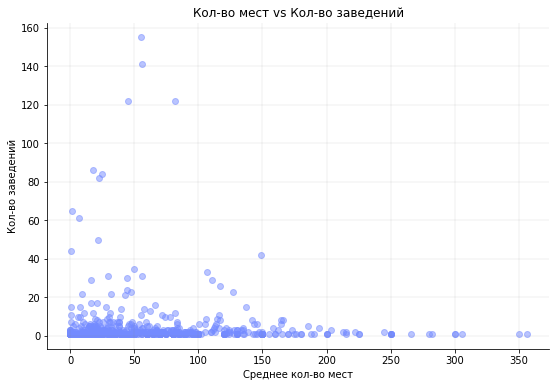

In [31]:
#построим диаграмму рассеяния
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(ch_group['number'], ch_group['id'], color='#748BFF', alpha=0.5)
ax.set_title("Кол-во мест vs Кол-во заведений")
ax.grid(color='grey', alpha=0.5, linewidth=0.25)
ax.set_xlabel("Среднее кол-во мест")
ax.set_ylabel("Кол-во заведений")
sns.despine(top=True, right=True);

Из диаграммы видно, что сетевых объектов с малым количеством посадочных мест больше, чем сетевых объектов с большим количеством посадосчных мест.

In [32]:
vis_ = type2.groupby('object_name', as_index=False).agg({'number': 'mean', 'id': 'count'})
vis_.head()

,object_name,number,id
0,Beverly Hills Diner,88.00,1
1,Bierloga,75.00,1
2,Black & White,40.00,1
3,Bocconcino,66.67,3
4,BooBo,46.00,1


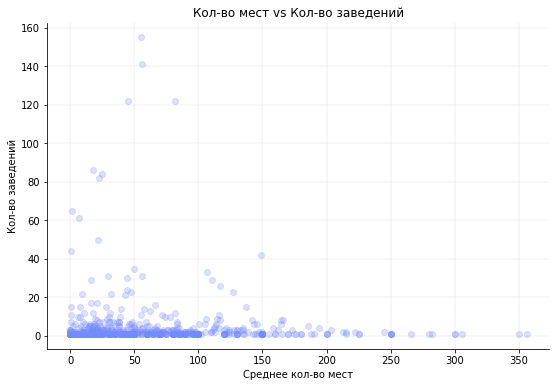

In [33]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(vis_['number'], vis_['id'], color='#748BFF', alpha=0.25)
ax.set_title("Кол-во мест vs Кол-во заведений")
ax.grid(color='grey', alpha=0.5, linewidth=0.25)
ax.set_xlabel("Среднее кол-во мест")
ax.set_ylabel("Кол-во заведений")
sns.despine(top=True, right=True);

### Среднее количество посадочных мест для каждого вида объекта общественного питания. 

In [35]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [36]:
#построим сводную таблицу количества посадочных мест в разбивке по типу объекта
ob_num = pd.DataFrame(data.pivot_table(index = 'object_type', values = 'number', aggfunc ='mean')\
                      .sort_values( by='number')).reset_index()
ob_num

,object_type,number
0,магазин (отдел кулинарии),5.59
1,закусочная,7.61
2,кафетерий,9.12
3,предприятие быстрого обслуживания,20.55
4,кафе,39.72
5,бар,43.49
6,буфет,51.13
7,ресторан,96.83
8,столовая,130.25


Text(0, 0.5, 'Тип объекта')

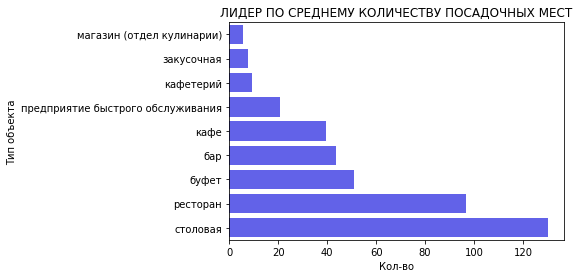

In [37]:
ax = sns.barplot(x='number', y='object_type', data=ob_num, color = 'blue', alpha=0.7) 
ax.set_title('ЛИДЕР ПО СРЕДНЕМУ КОЛИЧЕСТВУ ПОСАДОЧНЫХ МЕСТ')
ax.set_xlabel('Кол-во')
ax.set_ylabel('Тип объекта')
#plt.xticks(rotation=80)


Итак, лидером по среднему количеству посадочнух мест является тип объекта - столовая, а отдел кулинарии в магазинах имеет самое маленькое количество посадочных мест, что вполне логично.

### Как местоположение влияет на количество объектов общ.пит. в г. Москва

#### Работа с данными

##### Выделение улицы в отдельный столбец

Выделим из общего адреса (столбец adress) только улицу и сохраним в отдельном столбце streetname.

In [38]:
#создадим функцию для выделения подстроки в строке
def adr_str (row):
    """
    Создадим функцию, которая:
    - принимает строку с запятой
    - делит ее на части, с учетом запятой
    - если подстрока[1] содержит слова: улица, бульвар, переулок..., то возвращает подстроку[1]
    - иначе возвращает подстроку[2]
    - иначе возвращаем 'Некорректные данные'
    """
    st = ['улица', 'бульвар', 'переулок', 'проспект', 'шоссе', 'проезд', 'набережная', \
          'площадь','аллея', 'тупик', 'километр', 'город Зеленоград', 'квартал']
    splitted_text = row.split(',')
    for i in st:
        if i in splitted_text[1]:
            return splitted_text[1]
    else: 
        try: 
            return splitted_text[2]
        except: 
            return 'Некорректные данные'
    

#создадим новый столбец 
data['streetname'] = data['address'].apply(adr_str)    

data.head()

,id,object_name,chain,object_type,address,number,streetname
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [39]:
#проверим на наличие некорректных данных
data.loc[data['streetname'] == 'Некорректные данные'].head()


,id,object_name,chain,object_type,address,number,streetname
859,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"Партизанская улица, дом 30",100,Некорректные данные
860,23604,Буфет - ГБОУ 60,нет,буфет,"Партизанская улица, дом 30",100,Некорректные данные
7691,132359,Кафе «La Carotte»,нет,кафе,"1-й Нагатинский проезд, дом 10",198,Некорректные данные
8813,145235,Кафе при АЗС,нет,кафе,"проезд Добролюбова, дом 2",0,Некорректные данные
8843,19760,БУФЕТ ПРИ А-С ЮГО-ЗАПАД,нет,буфет,"Ленинский проспект, владение 164",16,Некорректные данные


Выявили 20 строк с некорректными данными - в них не указан город, а адрес начинается сразу с указания улицы. Такие данные требуют доработки.

In [40]:
#создадим функцию для выделения подстроки в строке
def part_str (row):
    """
    Создадим функцию, которая:
    - принимает строку с запятой
    - делит ее на части, с учетом запятой
    - возвращает подстроку до первой запятой
    """
    splitted_text = row.split(',')
    return splitted_text[0]
    

#создадим новый столбец 
data.loc[data['streetname'] == 'Некорректные данные','streetname'] = \
data.loc[data['streetname'] == 'Некорректные данные', 'address'].apply(part_str)    



In [41]:
data.loc[data['streetname'] == 'Некорректные данные']

,id,object_name,chain,object_type,address,number,streetname


In [42]:
#удалим пробел в данных столбца streetname
data['streetname'] = data['streetname'].apply(lambda x:x.lstrip())
data.head()

,id,object_name,chain,object_type,address,number,streetname
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


Итак, мы выделили в отдельный столбец street  из полного адоеса только улицу.

In [43]:
# пример подготовки данных
distr.sample(frac=0.1).groupby('streetname', as_index=False).agg({'okrug': set, 'area': set})

,streetname,okrug,area
0,1-й Балтийский переулок,{САО},{Район Аэропорт}
1,1-й Вязовский проезд,{ЮВАО},{Рязанский район}
2,1-й Кадашёвский переулок,{ЦАО},{Район Якиманка}
3,1-й Кожуховский проезд,{ЮАО},{Даниловский район}
4,1-й Котляковский переулок,{ЮАО},{Район Москворечье-Сабурово}
5,1-й Новотихвинский переулок,{СВАО},{Район Марьина роща}
6,1-й Раушский переулок,{ЦАО},{Район Замоскворечье}
7,1-й Рижский переулок,{СВАО},{Алексеевский район}
8,1-й Сыромятнический переулок,{ЦАО},{Басманный район}
9,1-й Троицкий переулок,{ЦАО},{Мещанский район}


In [45]:
print(f"Было: {data.shape}")
#print(f"Стало (после merge): {data_mer.shape}")

Было: (15366, 7)


#### Топ-10 улиц и районов Москвы по количеству объектов общ.пит.

Найдем топ-10 улиц по количеству объектов общ.пит. и построим график.

In [46]:
data.head()

,id,object_name,chain,object_type,address,number,streetname
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [47]:
#Сгруппируем данные по столбцу streetname, посчитаем кол-во объектов и кол-во посад.мест
#отсортируем и возьмем первые 10 строк
data_s = data.groupby('streetname', as_index=False).agg({'number':['count','mean', 'max','min']})
#сбросим мультиназвания столбцов
data_s.columns = [tup[1] if tup[1] else tup[0] for tup in data_s.columns]
d_t10 = pd.DataFrame(data_s.sort_values(by = 'count', ascending=False)).reset_index().head(10)
d_t10
#data_s

,index,streetname,count,mean,max,min
0,1364,город Зеленоград,232,73.49,520,0
1,1489,проспект Мира,204,62.70,326,0
2,1011,Профсоюзная улица,182,46.41,240,0
3,693,Ленинградский проспект,171,52.69,625,0
4,997,Пресненская набережная,167,45.84,478,0
5,414,Варшавское шоссе,165,52.28,500,0
6,696,Ленинский проспект,148,63.15,495,0
7,1486,проспект Вернадского,132,66.97,1288,0
8,684,Кутузовский проспект,114,85.06,1700,0
9,609,Каширское шоссе,112,55.10,680,0


Text(0, 0.5, 'Улица')

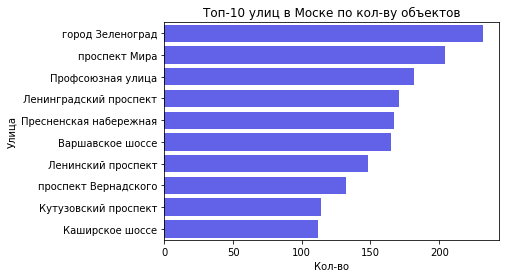

In [48]:
#построим столбчатую диаграмму
ax = sns.barplot(x='count', y='streetname', data=d_t10, color = 'blue', alpha=0.7) 
ax.set_title('Топ-10 улиц в Моске по кол-ву объектов')
ax.set_xlabel('Кол-во')
ax.set_ylabel('Улица')
#plt.xticks(rotation=90)

In [49]:
#Создадим список Топ-10 улиц и сохраним его в переменную top10
top10 = list(d_t10['streetname'])
top10

['город Зеленоград',
 'проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе']

Таким образом видим список топ-10 улиц Москвы, где больше всего сосредоточены объекты общ.пит. Скорее всего можно проследить закономерность: чем длиннее протяженность улицы и чем улица находится ближе к центральной части города - тем больше количество объектов общ.пит. она имеет. Исключением в списке - г.Зеленоград, так как он является одновременно не только улицей, но и одним из 12 округов г.Москвы. 

Найдем в каких районах Москвы находятся эти топ-10 улиц по количеству объектов общ.пит.

Объединим две таблицы: основную с объектами общ.пит и с районами г.Москвы.

In [50]:
distr.head()



,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [51]:
distr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
streetname    4398 non-null object
areaid        4398 non-null int64
okrug         4398 non-null object
area          4398 non-null object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
streetname     15366 non-null object
dtypes: int64(2), object(5)
memory usage: 840.5+ KB


In [53]:
#объединим две таблицы
distr_t10 = d_t10.merge(distr, on='streetname', how='left')
distr_t10

,index,streetname,count,mean,max,min,areaid,okrug,area
0,1364,город Зеленоград,232,73.49,520,0,51,Зеленоград,Район Крюково
1,1364,город Зеленоград,232,73.49,520,0,52,Зеленоград,Район Матушкино-Савелки
2,1364,город Зеленоград,232,73.49,520,0,53,Зеленоград,Панфиловский район
3,1489,проспект Мира,204,62.70,326,0,70,СВАО,Алексеевский район
4,1489,проспект Мира,204,62.70,326,0,86,СВАО,Ярославский Район
5,1489,проспект Мира,204,62.70,326,0,78,СВАО,Район Марьина роща
6,1489,проспект Мира,204,62.70,326,0,79,СВАО,Останкинский район
7,1489,проспект Мира,204,62.70,326,0,81,СВАО,Район Ростокино
8,1489,проспект Мира,204,62.70,326,0,82,СВАО,Район Свиблово
9,1489,проспект Мира,204,62.70,326,0,16,ЦАО,Мещанский район


In [54]:
#сгруппируем по районам отфильтрованный ранее по топ-10 улиц датафрейм, 

distr_t10_group = distr_t10.groupby('area')[['streetname']].count().sort_values(by = 'streetname', ascending=False)\
.reset_index()
area_t10 = pd.DataFrame(distr_t10_group)
area_t10 

,area,streetname
0,Район Проспект Вернадского,2
1,Донской район,2
2,Ломоносовский район,2
3,Обручевский район,2
4,Район Нагатино-Садовники,2
5,Район Теплый Стан,2
6,Район Тропарево-Никулино,2
7,Район Гагаринский,2
8,Район Фили-Давыдково,1
9,Район Ростокино,1


Получили список из 40 районов г.Москвы, где расположены топ-10 улиц по количеству заведений общ.пит. Список увеличился так как одна улица может проходить по нескольким районам.

Теперь посмотрим в каких округах находятся эти районы.

In [55]:
#сгруппируем по округам отфильтрованный ранее по топ-10 улиц датафрейм, 

okrug_t10_group = distr_t10.groupby('okrug')[['streetname']].count()\
.sort_values(by = 'streetname', ascending=False)\
.reset_index()
okr_t10 = pd.DataFrame(okrug_t10_group)
okr_t10 

,okrug,streetname
0,ЮЗАО,14
1,ЮАО,11
2,ЗАО,7
3,СВАО,6
4,САО,4
5,Зеленоград,3
6,ЦАО,3


Text(0, 0.5, 'Округ')

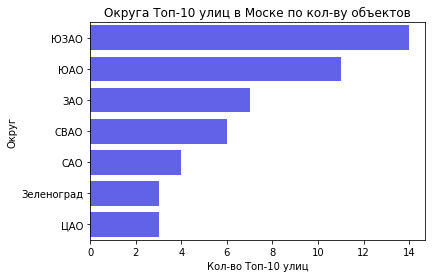

In [56]:
#построим столбчатую диаграмму
ax = sns.barplot(x='streetname', y='okrug', data=okr_t10, color = 'blue', alpha=0.7) 
ax.set_title('Округа Топ-10 улиц в Моске по кол-ву объектов')
ax.set_xlabel('Кол-во Топ-10 улиц')
ax.set_ylabel('Округ')
#plt.xticks(rotation=90)

Сгруппировав данные по округам, видим: лидер среди топ-10 улиц - ЮЗАО, а ЦАО - в самом конце среди топов. Это объясняется, что ЦАО - самый небольшой по площади округ, а ЮЗАО - один из крупных.

##### Распределение количества посадочных мест для топ-10 улиц Москвы.

In [57]:
distr_t10.head()

,index,streetname,count,mean,max,min,areaid,okrug,area
0,1364,город Зеленоград,232,73.49,520,0,51,Зеленоград,Район Крюково
1,1364,город Зеленоград,232,73.49,520,0,52,Зеленоград,Район Матушкино-Савелки
2,1364,город Зеленоград,232,73.49,520,0,53,Зеленоград,Панфиловский район
3,1489,проспект Мира,204,62.70,326,0,70,СВАО,Алексеевский район
4,1489,проспект Мира,204,62.70,326,0,86,СВАО,Ярославский Район


Посмотрим среднее количество посадочных мест на одно заведение на топ-10 улицах.

In [58]:
#Сгруппируем данные по столбцу streetname
d = distr_t10.groupby('streetname')[['mean']].agg(['mean'])
#сбросим мультиназвание столбца
d.columns = [tup[1] if tup[1] else tup[0] for tup in d.columns]
#преобразуем в датафрейм, сбросим индексы и отсортируем
d1 = pd.DataFrame(d).reset_index().sort_values(by = 'mean', ascending=False) 

d1

,streetname,mean
2,Кутузовский проспект,85.06
7,город Зеленоград,73.49
8,проспект Вернадского,66.97
4,Ленинский проспект,63.15
9,проспект Мира,62.70
1,Каширское шоссе,55.10
3,Ленинградский проспект,52.69
0,Варшавское шоссе,52.28
6,Профсоюзная улица,46.41
5,Пресненская набережная,45.84


In [59]:
d1.median()

mean   58.90
dtype: float64

Среднее количество посадочных мест на одно заведение на топ-10 улицах составило примерно 60 мест. Есть исключение: Кутузовский проспект - 85 мест, но это количество объясняется нахождением на этой улице Arena by Soho Family. Это заведение рассчитано на прием до 4000 гостей и включает в себя просторный танцпол, гардероб на 6000 мест, балконы с барами, вместительную и комфортную бекстейдж зону, гримерные для артистов, VIP зал, караоке. 

Найдем заведения на топ-10 улицах с минимальным количеством посадочных мест и посмотрим, где таких заведений больше.

In [61]:
#выведем на экран столбцы с количеством посадочных мест равных 0
num_zero = distr_t10[distr_t10['min'] == distr_t10['min'].min()]
num_zero.head()

,index,streetname,count,mean,max,min,areaid,okrug,area
0,1364,город Зеленоград,232,73.49,520,0,51,Зеленоград,Район Крюково
1,1364,город Зеленоград,232,73.49,520,0,52,Зеленоград,Район Матушкино-Савелки
2,1364,город Зеленоград,232,73.49,520,0,53,Зеленоград,Панфиловский район
3,1489,проспект Мира,204,62.70,326,0,70,СВАО,Алексеевский район
4,1489,проспект Мира,204,62.70,326,0,86,СВАО,Ярославский Район


In [62]:
#Сгруппируем данные по столбцу streetname
zero = num_zero.groupby('streetname')[['min']].agg(['count'])
#сбросим мультиназвание столбца
zero.columns = [tup[1] if tup[1] else tup[0] for tup in d.columns]
#преобразуем в датафрейм, сбросим индексы и отсортируем
zero1 = pd.DataFrame(zero).reset_index().sort_values(by = 'e', ascending=False) 

zero1

,streetname,e
0,Варшавское шоссе,8
4,Ленинский проспект,8
9,проспект Мира,7
6,Профсоюзная улица,6
8,проспект Вернадского,5
1,Каширское шоссе,4
3,Ленинградский проспект,4
7,город Зеленоград,3
2,Кутузовский проспект,2
5,Пресненская набережная,1


То есть лидерующую. позицию среди топ-10 улиц Москвы по наличию предприятий быстрого обслуживания, которые работают на доставку или "на вынос" поделили: Варшавское шоссе и Ленинский проспект. 

Для наглядности анализа закономерности построим диаграммы таблиц, построенных выше.

Text(0, 0.5, 'Улица')

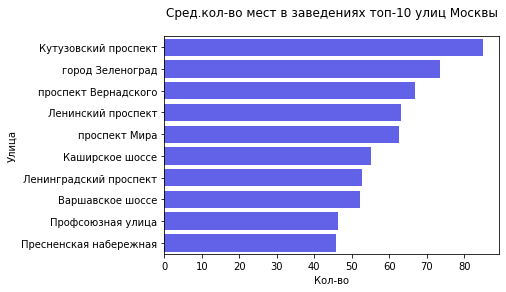

In [63]:
#построим столбчатую диаграмму
ax = sns.barplot(x='mean', y='streetname', data=d1, color = 'blue', alpha=0.7) 
ax.set_title('Сред.кол-во мест в заведениях топ-10 улиц Москвы', pad=20)
ax.set_xlabel('Кол-во')
ax.set_ylabel('Улица')
#plt.xticks(rotation=90)

Text(0, 0.5, 'Улица')

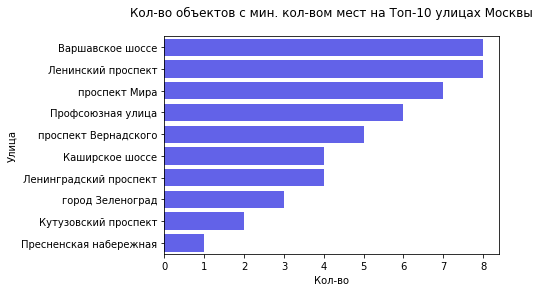

In [64]:
#построим столбчатую диаграмму
ax = sns.barplot(x='e', y='streetname', data=zero1, color = 'blue', alpha=0.7) 
ax.set_title('Кол-во объектов с мин. кол-вом мест на Топ-10 улицах Москвы', pad=20)
ax.set_xlabel('Кол-во')
ax.set_ylabel('Улица')
#plt.xticks(rotation=90)

#### Районы Москвы с одним объектом общ.пит.

Выделим в таблице улицы с одним объектом общ.пит.

In [65]:
#Сгруппируем данные по столбцу streetname и посчитаем кол-во объектов на этих улицах
one_ob = data.groupby('streetname')[['number']].agg(['count'])
#сбросим мультиназвание столбца
one_ob.columns = [tup[1] if tup[1] else tup[0] for tup in d.columns]
#преобразуем в датафрейм, сбросим индексы и отсортируем
one_ob1 = pd.DataFrame(one_ob).reset_index()
#выделим улицы с одним обектом общ.пит. и сохраним в таблицы one_ob2
one_ob2 = one_ob1[one_ob1['e'] == 1]
one_ob2.head()

,streetname,e
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1


In [66]:
#подсчитаем количество улиц с одним обектом
one_ob2.count()

streetname    599
e             599
dtype: int64

In [67]:
(599/3716)*100

16.119483315392895

Итак, количество улиц в Москве, где находится один объект общ.пит. составило 599 улиц. Учитывая, что всего улиц в Москве - 3716, толя таких улиц  - 16%. Что немало для столицы.

Посмотрим в каких округах сосредоточены такие улицы. 

In [68]:
#объединим две таблицы
distr_one = one_ob2.merge(distr, on='streetname', how='left')
distr_one.head()

,streetname,e,areaid,okrug,area
0,1-й Балтийский переулок,1,54.00,САО,Район Аэропорт
1,1-й Басманный переулок,1,13.00,ЦАО,Басманный район
2,1-й Басманный переулок,1,15.00,ЦАО,Красносельский район
3,1-й Ботанический проезд,1,82.00,СВАО,Район Свиблово
4,1-й Вешняковский проезд,1,120.00,ЮВАО,Рязанский район


In [69]:
#сгруппируем таблицу по округам

d_one = distr_one.groupby('okrug')[['area']].count().reset_index()
d_one = pd.DataFrame(d_one)
d_one

,okrug,area
0,ВАО,67
1,ЗАО,44
2,Зеленоград,2
3,САО,55
4,СВАО,63
5,СЗАО,26
6,ЦАО,184
7,ЮАО,30
8,ЮВАО,55
9,ЮЗАО,28


Получился список из 10 округов г.Москвы. Учитывая, что всего округов в Москве 12, то можно сделать вывод, что улицы с одним объектом общ.пит. в Москве встречаются равномерно по всей Москве.

Вывод п.3. 

Проведя анализ данных объектов общ.пит. в Москве, пришли к следующим результатам:

1. Количество несетевых объектов общ.пит. в 4 раза больше, чем количество сетевых.


2. Самый популярный вид объекта общ.пит. - кафе.  Результат вполне очевиден. 
   

3. Подробнее изучив сетевые объекты общ.пит. Пришли к выводу, что подобных объектов с малым количеством посадочных мест больше, чем сетевых объектов с большим количеством посадочных мест. 


4. Лидером по среднему количеству посадочных мест является тип объекта - столовая, а отдел кулинарии в магазинах имеет самое маленькое количество посадочных мест, что вполне логично.


5. Как местоположение влияет на количество объектов общ.пит. в г. Москва?  В исследовании выделили топ-10 улиц  Москвы где больше всего сосредоточены объекты общ.пит. Скорее всего можно проследить закономерность: чем длиннее протяженность улицы и чем улица находится ближе к центральной части города - тем больше количество объектов общ.пит. она имеет. Исключением в списке - г.Зеленоград, так как он является одновременно не только улицей, но и одним из 12 округов г.Москвы. Сгруппировав данные по округам, видим: лидер среди топ-10 улиц - ЮЗАО, а ЦАО - в самом конце среди топов. Это объясняется, что ЦАО - самый небольшой по площади округ, а ЮЗАО - один из крупных.


6. Среднее количество посадочных мест на одно заведение на топ-10 улицах составило примерно 60 мест. Есть исключение: Кутузовский проспект - 85 мест, но это количество объясняется нахождением на этой улице Arena by Soho Family. Это заведение рассчитано на прием до 4000 гостей и включает в себя просторный танцпол, гардероб на 6000 мест, балконы с барами, вместительную и комфортную бекстейдж зону, гримерные для артистов, VIP зал, караоке. 
    Лидерующую. позицию среди топ-10 улиц Москвы по наличию предприятий быстрого обслуживания, которые работают на доставку или "на вынос" поделили: Варшавское шоссе и Ленинский проспект.

7. Проанализировав улицы в Москве, где находится один объект общ.пит., пришли к выводам: количество таких улиц составило 599 улиц. Учитывая, что всего улиц в Москве - 3716, толя таких улиц  - 16%. Что немало для столицы. Сгруппировав эти улицы по округам получился список из 10 округов г.Москвы. Так как всего округов в Москве 12, то улицы с одним объектом общ.пит. в Москве встречаются равномерно по всей столице.


## Общие выводы.

Итак, нами было проведено исследование по изучению текущего положения дел на рынке заведений общественного питания г.Москвы. Данное исследование необходимо инвесторам проекта по открытию небольшого кафе в Москве, где гостей должны обслуживать роботы. 

В п.1-п.2 были проведены изучение и предобработка предоставленных данных о заведениях общественного питания в Москве.


Далее было проведено само исследование, в результате которого мы пришли к следующим выводам:

1. Количество несетевых объектов общ.пит. в 4 раза больше, чем количество сетевых.  Это вполне неплохой показатель, который может сказать о разнообразии сферы общ. питания в Москве: объектов много и они могут удовлетворить любой вкус и любой бюджет.


2. Самый популярный вид объекта общ.пит. - кафе.  Результат вполне очевиден. 
   Кафе – заведение общественного питания, схожее по некоторым параметрам с рестораном, но как правило с меньшим ассортиментом в меню и некоторыми различиями в обслуживании гостей. Этот тип заведений предназначен в первую очередь, чтобы дать возможность быстро перекусить или выпить чашку кофе за деловой или личной встречей.


3. Подробнее изучив сетевые объекты общ.пит. Пришли к выводу, что подобных объектов с малым количеством посадочных мест больше, чем сетевых объектов с большим количеством посадочных мест. Действительно, ведь часто сетевые объекты общ.пит. работают на доставку или «на вынос», или рассчитаны на быстрый перекус. 


4. Лидером по среднему количеству посадочных мест является тип объекта - столовая, а отдел кулинарии в магазинах имеет самое маленькое количество посадочных мест, что вполне логично.


5. Как местоположение влияет на количество объектов общ.пит. в г. Москва?  В исследовании выделили топ-10 улиц  Москвы где больше всего сосредоточены объекты общ.пит. Скорее всего можно проследить закономерность: чем длиннее протяженность улицы и чем улица находится ближе к центральной части города - тем больше количество объектов общ.пит. она имеет. Исключением в списке - г.Зеленоград, так как он является одновременно не только улицей, но и одним из 12 округов г.Москвы. Сгруппировав данные по округам, видим: лидер среди топ-10 улиц - ЮЗАО, а ЦАО - в самом конце среди топов. Это объясняется, что ЦАО - самый небольшой по площади округ, а ЮЗАО - один из крупных.



6. Среднее количество посадочных мест на одно заведение на топ-10 улицах составило примерно 60 мест. Есть исключение: Кутузовский проспект - 85 мест, но это количество объясняется нахождением на этой улице Arena by Soho Family. Это заведение рассчитано на прием до 4000 гостей и включает в себя просторный танцпол, гардероб на 6000 мест, балконы с барами, вместительную и комфортную бекстейдж зону, гримерные для артистов, VIP зал, караоке. 
    Лидерующую. позицию среди топ-10 улиц Москвы по наличию предприятий быстрого обслуживания, которые работают на доставку или "на вынос" поделили: Варшавское шоссе и Ленинский проспект.


7. Проанализировав улицы в Москве, где находится один объект общ.пит., пришли к выводам: количество таких улиц составило 599 улиц. Учитывая, что всего улиц в Москве - 3716, толя таких улиц  - 16%. Что немало для столицы. Сгруппировав эти улицы по округам получился список из 10 округов г.Москвы. Так как всего округов в Москве 12, то улицы с одним объектом общ.пит. в Москве встречаются равномерно по всей столице.

Исходя из выводов по исследованию рынка заведений общ.пит. города Москвы, предполагаю, что новое кафе целесообразнее открывать в ЦАО г.Москвы, как более развитом, более посещаемом, но не перегруженном объектами общ.пит. округа Москвы. Тип обслуживание выбрать кафе не более чем на 60 посадочных мест, так как кафе - самый популярный для посетителей тип объекта. 

 

Презентация: < https://disk.yandex.ru/i/X-tMLNRJ16To7A >